In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine

## 1) 載入資料集

In [2]:
wine = load_wine()
df_data = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= ["alcohol","malic_acid","ash","alcalinity_of_ash","magnesium","total_phenols","flavanoids","nonflavanoid_phenols","proanthocyanins","color_intensity","hue","od280/od315_of_diluted_wines","proline","age"])
df_data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,age
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


## 2) 切割訓練集與測試集

In [3]:
from sklearn.model_selection import train_test_split
X = df_data.drop(labels=['age'],axis=1).values # 移除age並取得剩下欄位資料
y = df_data['age'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print('train shape:', X_train.shape)
print('test shape:', X_test.shape)

train shape: (124, 13)
test shape: (54, 13)


## 隨機森林(分類器)
隨機森林其實就是進階版的決策樹。隨機森林是使用 Bagging + 隨機特徵的技術所產生出來的 Ensemble learning 演算法。

Parameters:
- n_estimators: 森林中樹木的數量，預設=100。
- max_features: 劃分時考慮的最大特徵數，預設auto。
- criterion: 亂度的評估標準，gini/entropy。預設為gini。
- max_depth: 樹的最大深度。
- splitter: 特徵劃分點選擇標準，best/random。預設為best。
- random_state: 亂數種子，確保每次訓練結果都一樣，splitter=random 才有用。
- min_samples_split: 至少有多少資料才能再分
- min_samples_leaf: 分完至少有多少資料才能分

Attributes:
- feature_importances_: 查詢模型特徵的重要程度。

Methods:
- fit: 放入X、y進行模型擬合。
- predict: 預測並回傳預測類別。
- score: 預測成功的比例。
- predict_proba: 預測每個類別的機率值。
- get_depth: 取得樹的深度。

In [4]:
from sklearn.ensemble import RandomForestClassifier

# 建立 Random Forest Classifier 模型
randomForestModel = RandomForestClassifier(n_estimators=100, criterion = 'gini')
# 使用訓練資料訓練模型
randomForestModel.fit(X_train, y_train)
# 使用訓練資料預測分類
predicted = randomForestModel.predict(X_train)

## 使用Score評估模型

In [6]:
# 預測成功的比例
print('訓練集: ',randomForestModel.score(X_train,y_train))
print('測試集: ',randomForestModel.score(X_test,y_test))

訓練集:  1.0
測試集:  1.0


## 特徵重要程度

In [7]:
print('特徵重要程度: ',randomForestModel.feature_importances_)

特徵重要程度:  [0.14306035 0.02352558 0.01413323 0.02877128 0.03415757 0.04034492
 0.15443598 0.01076423 0.02323612 0.17976367 0.07312945 0.12282079
 0.15185681]


## 真實分類

In [8]:
# 建立測試集的 DataFrme
df_test=pd.DataFrame(X_test, columns= ["alcohol","malic_acid","ash","alcalinity_of_ash","magnesium","total_phenols","flavanoids","nonflavanoid_phenols","proanthocyanins","color_intensity","hue","od280/od315_of_diluted_wines","proline"])
df_test['age'] = y_test
pred = randomForestModel.predict(X_test)
df_test['Predict'] = pred

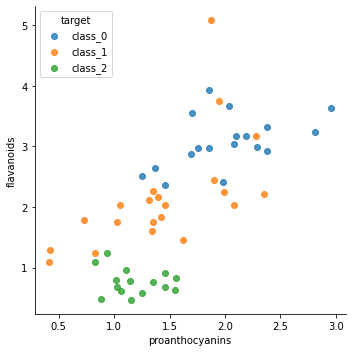

In [9]:
sns.lmplot(x="proanthocyanins", y="flavanoids", hue='age', data=df_test, fit_reg=False, legend=False)
plt.legend(title='target', loc='upper left', labels=['class_0', 'class_1', 'class_2'])
plt.show()

## 隨機森林 (訓練集)預測結果

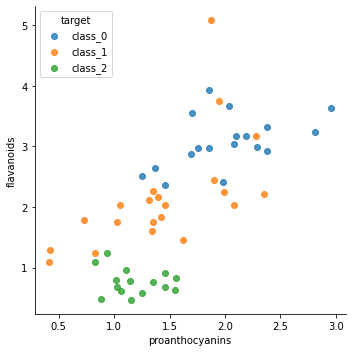

In [10]:
sns.lmplot(x="proanthocyanins", y="flavanoids", data=df_test, hue="Predict", fit_reg=False, legend=False)
plt.legend(title='target', loc='upper left', labels=['class_0', 'class_1', 'class_2'])
plt.show()

## 繪製森林中的每一棵樹

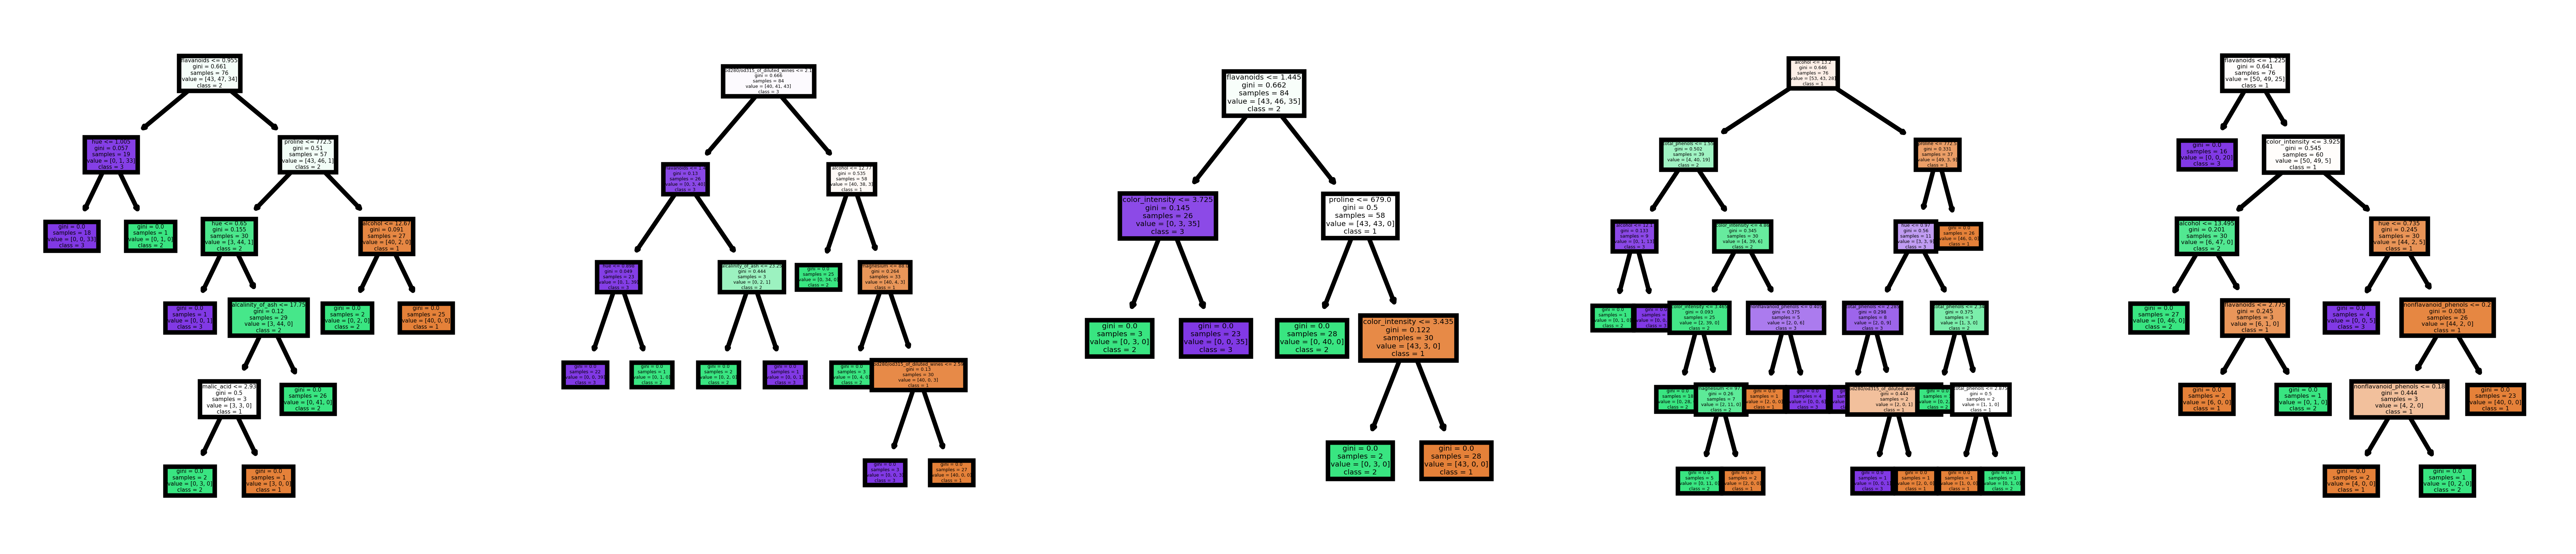

In [11]:
from sklearn import tree
featureName=["alcohol","malic_acid","ash","alcalinity_of_ash","magnesium","total_phenols","flavanoids","nonflavanoid_phenols","proanthocyanins","color_intensity","hue","od280/od315_of_diluted_wines","proline"]
className=['1','2','3']
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
# 繪製前五棵樹
for index in range(0, 5):
    tree.plot_tree(randomForestModel.estimators_[index],
                   feature_names = featureName, 
                   class_names=className,
                   filled = True,
                   ax = axes[index]);